# Logistic Regression

In [ ]:
data Neuralgia;
   input Treatment $ Sex $ Age Duration Pain $ @@;
   datalines;
P  F  68   1  No   B  M  74  16  No  P  F  67  30  No
P  M  66  26  Yes  B  F  67  28  No  B  F  77  16  No
A  F  71  12  No   B  F  72  50  No  B  F  76   9  Yes
A  M  71  17  Yes  A  F  63  27  No  A  F  69  18  Yes
B  F  66  12  No   A  M  62  42  No  P  F  64   1  Yes
A  F  64  17  No   P  M  74   4  No  A  F  72  25  No
P  M  70   1  Yes  B  M  66  19  No  B  M  59  29  No
A  F  64  30  No   A  M  70  28  No  A  M  69   1  No
B  F  78   1  No   P  M  83   1  Yes B  F  69  42  No
B  M  75  30  Yes  P  M  77  29  Yes P  F  79  20  Yes
A  M  70  12  No   A  F  69  12  No  B  F  65  14  No
B  M  70   1  No   B  M  67  23  No  A  M  76  25  Yes
P  M  78  12  Yes  B  M  77   1  Yes B  F  69  24  No
P  M  66   4  Yes  P  F  65  29  No  P  M  60  26  Yes
A  M  78  15  Yes  B  M  75  21  Yes A  F  67  11  No
P  F  72  27  No   P  F  70  13  Yes A  M  75   6  Yes
B  F  65   7  No   P  F  68  27  Yes P  M  68  11  Yes
P  M  67  17  Yes  B  M  70  22  No  A  M  65  15  No
P  F  67   1  Yes  A  M  67  10  No  P  F  72  11  Yes
A  F  74   1  No   B  M  80  21  Yes A  F  69   3  No
;

In [5]:
proc print data=Neuralgia  (obs=5);
run;

Obs,Treatment,Sex,Age,Duration,Pain
1,P,F,68,1,No
2,B,M,74,16,No
3,P,F,67,30,No
4,P,M,66,26,Yes
5,B,F,67,28,No


In [6]:
proc logistic data=Neuralgia;
   class Treatment Sex;
   model Pain= Treatment Sex Treatment*Sex Age Duration / expb;
run;

As you can see, PROC LOGISTIC models the probability of no pain (Pain=No). We can change this by using the DESCENDING option. Let's say we are interested in changing our treatment reference to "A".

**Question**

1. What is expb doing?

We can also look at the Hosmer and Lemeshow goodness-of-fit test and the ROC curve. Both statistics will help us to check our model fit.


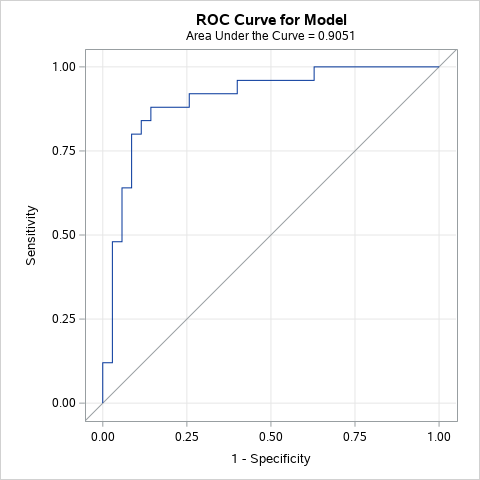

In [14]:
proc logistic data=Neuralgia descending plots(only)=roc;
   class Treatment(ref="A") Sex;
   model Pain= Treatment Sex Treatment*Sex Age Duration / expb lackfit;
run;

Finally, let's check if we have influential observations. For more information about this, you can check this link[https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.3&docsetId=statug&docsetTarget=statug_logistic_details38.htm&locale=en]


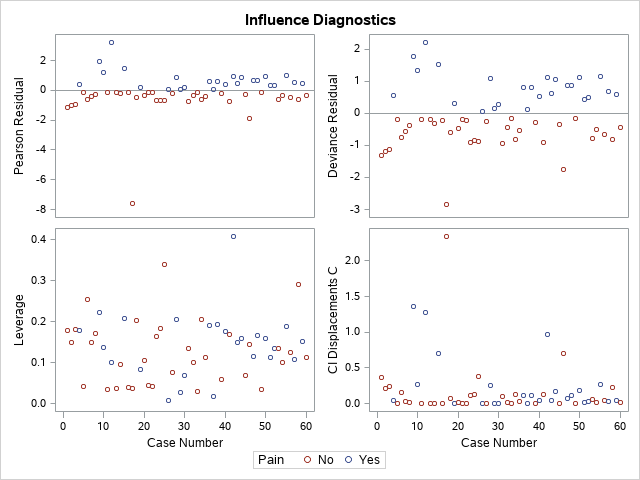
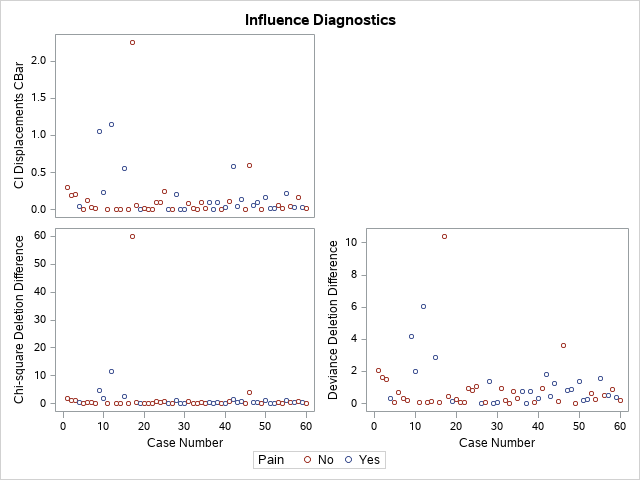
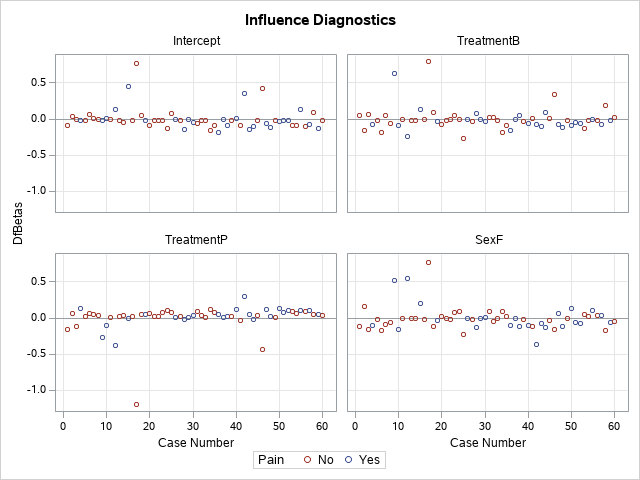
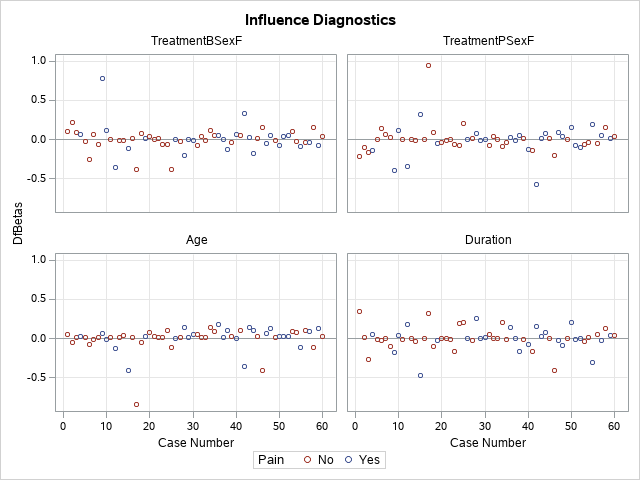

In [15]:
proc logistic data=Neuralgia descending;
   class Treatment(ref="A") Sex;
   model Pain= Treatment Sex Treatment*Sex Age Duration / expb influence;
run;